# Análise de Dados

- [Análise de Dados](https://medium.com/@aasouzaconsult/an%C3%A1lise-de-dados-91a93b0c1312)

# SQL 
- Usando SQL Server
    - [Montagem da base e tabelas](https://gist.github.com/aasouzaconsult/5754d41705d58770e2d7d75eff374e2b)
    - [Scripts SQL](https://gist.github.com/aasouzaconsult/279a3c613205bca8a24e9d31f9143464)
- Dica
    - [SQL Server - Github](https://github.com/Microsoft/sql-server-samples/tree/master/samples)

# Acessando o SQL Server via Python
Acessando via Python o SQL Server
- Consultando tabelas e views
- Análise Exploratória de Dados

## Conectando ao SQL Server

In [1]:
import pyodbc

Pode ser que peça para instalar o Pyodbc, Seaborn e matplotlib (pip instal...)

In [2]:
# Usaremos o ODBC Driver 17 for SQL Server
pyodbc.drivers()

['SQL Server',
 'MySQL ODBC 8.0 ANSI Driver',
 'MySQL ODBC 8.0 Unicode Driver',
 'SQL Server Native Client 11.0',
 'ODBC Driver 17 for SQL Server',
 'SQL Server Native Client RDA 11.0',
 'ODBC Driver 13 for SQL Server',
 'Simba Spark ODBC Driver',
 'Simba Athena ODBC Driver',
 'SQLite3 ODBC Driver',
 'SQLite ODBC Driver',
 'SQLite ODBC (UTF-8) Driver',
 'Microsoft Access Driver (*.mdb, *.accdb)',
 'Microsoft Excel Driver (*.xls, *.xlsx, *.xlsm, *.xlsb)',
 'Microsoft Access Text Driver (*.txt, *.csv)']

In [3]:
# Suppress all warnings
import warnings
warnings.filterwarnings("ignore")

# Importing the libraries
import os
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [23]:
conn = pyodbc.connect(DRIVER = '{ODBC Driver 17 for SQL Server}',
                      SERVER = 'CTNDELLGJZVJB3\AULA',
                      DATABASE = 'datawarehouse',
                      UID = 'sa',
                      PWD = 'Aula@123')

cursor = conn.cursor()

## Consultando tabelas no SQL Server

In [24]:
SQL_Query = pd.read_sql_query('select * FROM fato_vendas', conn)
fato_vendas = pd.DataFrame(SQL_Query)

In [25]:
fato_vendas

,CodigoVenda,DataVenda,CodigoCliente,CodigoProduto,Quantidade,ValorUnitario,CodigoVendedor,CodigoCanalVendas,CodigoStatus,Deletado
0,1,2010-02-01,1,1.00,4000,0.34,2,1,1,0
1,2,2010-02-01,1,NaN,4000,0.34,2,1,1,0
2,3,2010-02-01,5,1.00,4200,0.34,4,1,1,0
3,4,2010-02-02,3,2.00,250,7.00,2,1,1,0
4,5,2010-02-03,4,1.00,4500,0.34,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...
214,247,2020-04-01,18,5.00,20030,9.00,2,1,1,0
215,248,2023-02-01,18,5.00,20030,9.00,2,1,1,0
216,249,2023-03-01,18,5.00,20030,9.00,2,1,1,0
217,250,2023-04-01,18,5.00,30030,9.00,2,1,1,0


In [26]:
SQL_Query = pd.read_sql_query('select * FROM dim_produto', conn)
dim_produto = pd.DataFrame(SQL_Query)

In [27]:
dim_produto

,CodigoProduto,NomeProduto,TipoProduto,UnidadeProduto,SaldoProduto,StatusProduto
0,1,Produto A,A,KG,20000,Ativo
1,2,Produto C,A,KG,5000,Ativo
2,3,Produto E,B,KG,2000,Ativo
3,5,Produto CH,A,KG,2000,Ativo
4,4,Produto SL,A,KG,30000,Ativo
5,6,Produto TN,C,KG,1000,MVP - validação
6,8,Produto AA,A,KG,20000,Ativo
7,9,None,A,KG,20000,Inativo


In [28]:
SQL_Query = pd.read_sql_query('select * FROM dim_cliente', conn)
dim_cliente = pd.DataFrame(SQL_Query)

In [29]:
dim_cliente

,CodigoCliente,NomeCliente,Idade,Classificacao,Sexo,Cidade,Estado,Pais
0,1,Cliente AA,30,3,M,Florianópolis,Santa Catarina,Brasil
1,5,Cliente BB,20,2,F,Belo Horizonte,Minas Gerais,Brasil
2,3,Cliente BC,25,4,M,Baturité,Ceará,Brasil
3,4,Cliente CC,19,2,F,Fortaleza,Ceará,Brasil
4,6,Cliente DD,19,2,F,Goiânia,Goiás,Brasil
5,7,Cliente DE,39,5,F,João Pessoa,Paraíba,Brasil
6,8,Cliente EE,26,4,M,Natal,Rio Grande do Norte,Brasil
7,2,Cliente EF,31,3,M,Belo Horizonte,Minas Gerais,Brasil
8,10,Cliente ABC,50,1,M,São Paulo,São Paulo,Brasil
9,9,Cliente BCA,25,4,F,Rio de Janeiro,Rio de Janeiro,Brasil


In [34]:
# Usando Left Join
sql = """
      SELECT ven.*,
             pro.NomeProduto,
             pro.UnidadeProduto
        FROM      fato_vendas ven 
        LEFT JOIN dim_produto pro ON pro.CodigoProduto = ven.CodigoProduto;
      """
pd.read_sql(sql, conn)

,CodigoVenda,DataVenda,CodigoCliente,CodigoProduto,Quantidade,ValorUnitario,CodigoVendedor,CodigoCanalVendas,CodigoStatus,Deletado,NomeProduto,UnidadeProduto
0,1,2010-02-01,1,1.00,4000,0.34,2,1,1,0,Produto A,KG
1,2,2010-02-01,1,NaN,4000,0.34,2,1,1,0,None,None
2,3,2010-02-01,5,1.00,4200,0.34,4,1,1,0,Produto A,KG
3,4,2010-02-02,3,2.00,250,7.00,2,1,1,0,Produto C,KG
4,5,2010-02-03,4,1.00,4500,0.34,1,1,1,0,Produto A,KG
...,...,...,...,...,...,...,...,...,...,...,...,...
214,247,2020-04-01,18,5.00,20030,9.00,2,1,1,0,Produto CH,KG
215,248,2023-02-01,18,5.00,20030,9.00,2,1,1,0,Produto CH,KG
216,249,2023-03-01,18,5.00,20030,9.00,2,1,1,0,Produto CH,KG
217,250,2023-04-01,18,5.00,30030,9.00,2,1,1,0,Produto CH,KG


In [37]:
# Usando Window Function
sqlwf = '''
SELECT codigocliente,
       year(DataVenda) AS ano, 
	   codigoProduto,
	   Quantidade,
	   SUM(Quantidade) OVER(PARTITION BY codigocliente)                  AS quantidade_por_cliente,
	   SUM(Quantidade) OVER(PARTITION BY codigocliente, year(DataVenda)) AS quantidade_por_cliente_ano,
	   SUM(Quantidade) OVER() AS quantidade_total
  FROM fato_vendas
 ORDER BY codigocliente, year(DataVenda), Quantidade;
'''
pd.read_sql(sqlwf, conn)

,codigocliente,ano,codigoProduto,Quantidade,quantidade_por_cliente,quantidade_por_cliente_ano,quantidade_total
0,1,2010,1.00,4000,158000,8000,3779460
1,1,2010,NaN,4000,158000,8000,3779460
2,1,2011,1.00,4000,158000,4000,3779460
3,1,2012,1.00,14000,158000,14000,3779460
4,1,2013,1.00,24000,158000,24000,3779460
...,...,...,...,...,...,...,...
214,18,2021,5.00,20030,320660,20030,3779460
215,18,2023,5.00,10030,320660,80120,3779460
216,18,2023,5.00,20030,320660,80120,3779460
217,18,2023,5.00,20030,320660,80120,3779460


## Consultando uma Views no SQL Server

In [38]:
SQL_Query = pd.read_sql_query('select * FROM vwvendas_resumida', conn)
view_vendasresumida = pd.DataFrame(SQL_Query)

In [39]:
view_vendasresumida

,Data,Cliente,Produto
0,2010-02-01,Cliente AA,Produto A
1,2010-02-01,Cliente BB,Produto A
2,2010-02-02,Cliente BC,Produto C
3,2010-02-03,Cliente CC,Produto A
4,2010-03-05,Cliente DD,Produto A
...,...,...,...
213,2020-04-01,Cliente GRM,Produto CH
214,2023-02-01,Cliente GRM,Produto CH
215,2023-03-01,Cliente GRM,Produto CH
216,2023-04-01,Cliente GRM,Produto CH


## Análise Exploratória de Dados do SQL Server

In [40]:
# Visualizando as 5 primeiras linhas do Dataframe
fato_vendas.head()

,CodigoVenda,DataVenda,CodigoCliente,CodigoProduto,Quantidade,ValorUnitario,CodigoVendedor,CodigoCanalVendas,CodigoStatus,Deletado
0,1,2010-02-01,1,1.00,4000,0.34,2,1,1,0
1,2,2010-02-01,1,NaN,4000,0.34,2,1,1,0
2,3,2010-02-01,5,1.00,4200,0.34,4,1,1,0
3,4,2010-02-02,3,2.00,250,7.00,2,1,1,0
4,5,2010-02-03,4,1.00,4500,0.34,1,1,1,0


In [41]:
# Visualizando as informações de colunas do Dataframe
fato_vendas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219 entries, 0 to 218
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CodigoVenda        219 non-null    int64  
 1   DataVenda          219 non-null    object 
 2   CodigoCliente      219 non-null    int64  
 3   CodigoProduto      218 non-null    float64
 4   Quantidade         219 non-null    int64  
 5   ValorUnitario      219 non-null    float64
 6   CodigoVendedor     219 non-null    int64  
 7   CodigoCanalVendas  219 non-null    int64  
 8   CodigoStatus       219 non-null    int64  
 9   Deletado           219 non-null    int64  
dtypes: float64(2), int64(7), object(1)
memory usage: 17.2+ KB


**Informações estatísticas das colunas Dataframe**
- contagens
- média
- valores máximo e mínimo
- desvio padrão
- quartis...

In [42]:
fato_vendas.describe()
# lembra que vimos lá no SQL?

,CodigoVenda,CodigoCliente,CodigoProduto,Quantidade,ValorUnitario,CodigoVendedor,CodigoCanalVendas,CodigoStatus,Deletado
count,219.00,219.00,218.00,219.00,219.00,219.00,219.00,219.00,219.00
mean,123.26,9.46,2.38,17257.81,2.73,4.49,1.19,1.10,0.01
std,75.09,5.45,1.74,15244.07,3.45,2.93,0.39,0.42,0.12
min,1.00,1.00,1.00,250.00,0.25,1.00,1.00,1.00,0.00
25%,58.50,5.00,1.00,9500.00,0.34,2.00,1.00,1.00,0.00
50%,116.00,9.00,2.00,14200.00,0.34,4.00,1.00,1.00,0.00
75%,189.50,14.00,4.00,20030.00,7.00,7.00,1.00,1.00,0.00
max,251.00,18.00,6.00,91750.00,9.00,10.00,2.00,3.00,1.00


**Consultando dados nulos ou Missing Values no Dataframe**

Neste caso não tem, isso em um arquivo do dia a dia é raro!

In [43]:
fato_vendas.isnull().sum()

CodigoVenda          0
DataVenda            0
CodigoCliente        0
CodigoProduto        1
Quantidade           0
ValorUnitario        0
CodigoVendedor       0
CodigoCanalVendas    0
CodigoStatus         0
Deletado             0
dtype: int64

### Aprofundando na Análise Exploratória de Dados

In [44]:
# Importando bibliotecas que usaremos para visualizar as análises
import seaborn as sns
from matplotlib import pyplot as plt

In [45]:
# Define um estilo para nossos plots
plt.style.use('ggplot')

**Plota a distribuição da variável `Quantidade`**

- Essa é a variável que contem a Quantidade de Vendas.

Text(0.5, 1.0, 'Distribuição da coluna Quantidade')

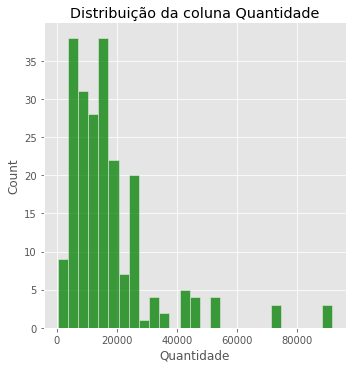

In [46]:
sns.displot(fato_vendas['Quantidade'],color='green', kde=False)
plt.title('Distribuição da coluna Quantidade')

**Plota a distribuição da variável `Valor Total`**

- Essa é a variável que contem a Valor Total.

Text(0.5, 1.0, 'Distribuição do Valor Total')

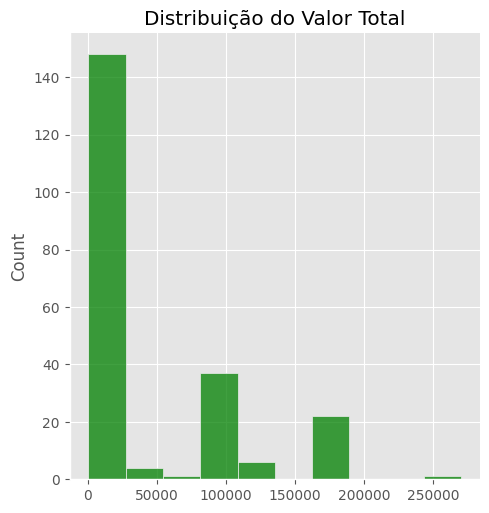

In [47]:
sns.displot(fato_vendas['Quantidade']*fato_vendas['ValorUnitario'],color='green', kde=False)
plt.title('Distribuição do Valor Total')

**Visualizando a Correlação entre algumas variáveis**

A Correlação de Pearson mede a dependência linear entre duas variáveis ​​X e Y.

O coeficiente resultante é um valor entre -1 e 1 inclusive, onde:

- 1 : Correlação linear positiva perfeita.
- 0 : Sem correlação linear, as duas variáveis ​​provavelmente não afetam uma à outra.
- -1 : Correlação linear negativa perfeita.
Correlação de Pearson é o método padrão da função “corr”.

Mostra:
- O quanto alguma variável numérica tem correlação com outra variável ?
- Correlação pode ser positiva ou negativa

In [48]:
fato_vendas

,CodigoVenda,DataVenda,CodigoCliente,CodigoProduto,Quantidade,ValorUnitario,CodigoVendedor,CodigoCanalVendas,CodigoStatus,Deletado
0,1,2010-02-01,1,1.00,4000,0.34,2,1,1,0
1,2,2010-02-01,1,NaN,4000,0.34,2,1,1,0
2,3,2010-02-01,5,1.00,4200,0.34,4,1,1,0
3,4,2010-02-02,3,2.00,250,7.00,2,1,1,0
4,5,2010-02-03,4,1.00,4500,0.34,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...
214,247,2020-04-01,18,5.00,20030,9.00,2,1,1,0
215,248,2023-02-01,18,5.00,20030,9.00,2,1,1,0
216,249,2023-03-01,18,5.00,20030,9.00,2,1,1,0
217,250,2023-04-01,18,5.00,30030,9.00,2,1,1,0


In [49]:
# Uma amostra dos dados
fato_vendas[['CodigoCliente','CodigoProduto','Quantidade','ValorUnitario']].head()

,CodigoCliente,CodigoProduto,Quantidade,ValorUnitario
0,1,1.00,4000,0.34
1,1,NaN,4000,0.34
2,5,1.00,4200,0.34
3,3,2.00,250,7.00
4,4,1.00,4500,0.34


In [50]:
# Correlação entre as variáveis
fato_vendas[['CodigoCliente','CodigoProduto','Quantidade','ValorUnitario']].corr()

,CodigoCliente,CodigoProduto,Quantidade,ValorUnitario
CodigoCliente,1.00,0.74,0.14,0.32
CodigoProduto,0.74,1.00,0.36,0.38
Quantidade,0.14,0.36,1.00,-0.06
ValorUnitario,0.32,0.38,-0.06,1.00


Plot o `mapa de calor` para visualizar as `correlações`

<AxesSubplot:>

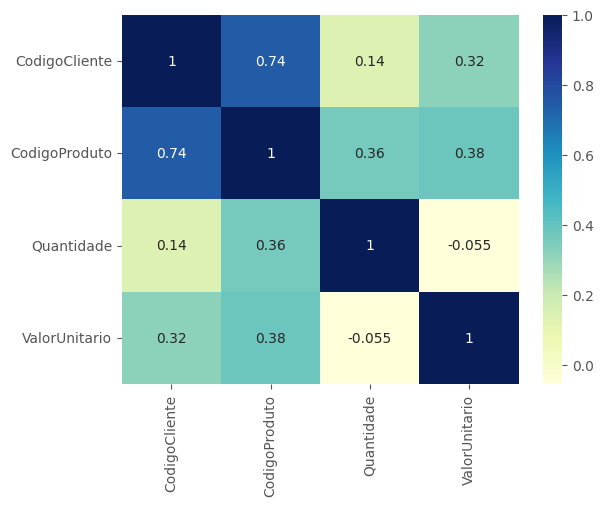

In [51]:
correlacoes = fato_vendas[['CodigoCliente','CodigoProduto','Quantidade','ValorUnitario']].corr()

sns.heatmap(correlacoes, annot=True, cmap="YlGnBu")

Quanto teve de vendas por produto?

In [52]:
fato_vendas['CodigoProduto'].value_counts().to_frame()

,CodigoProduto
1.00,106
2.00,42
5.00,26
6.00,17
4.00,16
3.00,11


Quantos clientes compraram distintamente?

In [53]:
Clientes = fato_vendas['CodigoCliente'].unique()

In [54]:
Clientes

array([ 1,  5,  3,  4,  6,  7,  8,  2, 10,  9, 11, 13, 14, 18, 16, 17],
      dtype=int64)

Quantas vendas acima de 70.000 Unidades?

In [55]:
fato_vendas[fato_vendas['Quantidade'] > 70000]

,CodigoVenda,DataVenda,CodigoCliente,CodigoProduto,Quantidade,ValorUnitario,CodigoVendedor,CodigoCanalVendas,CodigoStatus,Deletado
173,206,2021-08-01,17,6.00,71750,0.25,5,2,1,0
174,207,2021-08-07,17,6.00,91750,0.25,5,2,3,0
185,218,2022-08-29,14,6.00,71750,0.25,5,2,1,0
186,219,2022-09-15,14,6.00,91750,0.25,5,2,3,0
189,222,2022-08-21,6,6.00,71750,0.25,5,2,1,0
190,223,2022-08-23,6,6.00,91750,0.25,5,2,3,0


**Dispersão**

<AxesSubplot:xlabel='Quantidade', ylabel='ValorUnitario'>

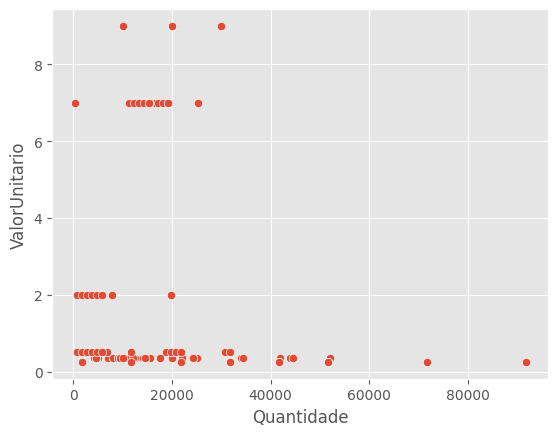

In [57]:
# Quanto maior o valor unitário, menor a quantidade vendida

sns.scatterplot(x='Quantidade', y='ValorUnitario', data=fato_vendas)

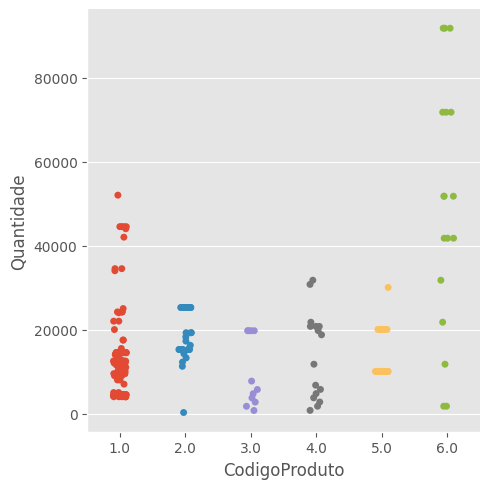

In [58]:
# Vendo o comportamento da quantidade de vendas por Codigo de Produto
sns.catplot(x='CodigoProduto', y='Quantidade', data=fato_vendas)

<AxesSubplot:xlabel='CodigoProduto', ylabel='Quantidade'>

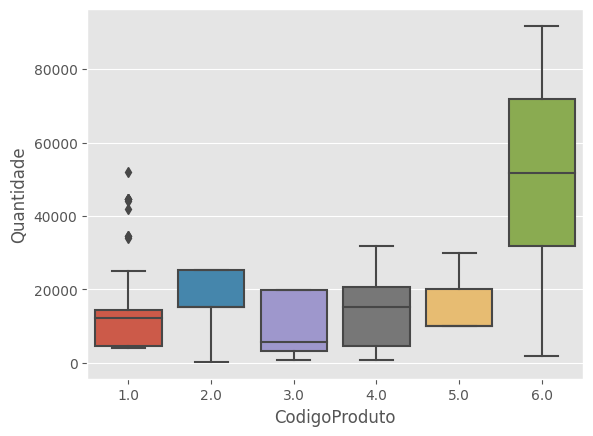

In [59]:
# Boxplot - Visualizando através de um boxplot
sns.boxplot(x='CodigoProduto', y='Quantidade', data=fato_vendas)

In [60]:
dim_produto

,CodigoProduto,NomeProduto,TipoProduto,UnidadeProduto,SaldoProduto,StatusProduto
0,1,Produto A,A,KG,20000,Ativo
1,2,Produto C,A,KG,5000,Ativo
2,3,Produto E,B,KG,2000,Ativo
3,5,Produto CH,A,KG,2000,Ativo
4,4,Produto SL,A,KG,30000,Ativo
5,6,Produto TN,C,KG,1000,MVP - validação
6,8,Produto AA,A,KG,20000,Ativo
7,9,None,A,KG,20000,Inativo


In [61]:
dim_cliente

,CodigoCliente,NomeCliente,Idade,Classificacao,Sexo,Cidade,Estado,Pais
0,1,Cliente AA,30,3,M,Florianópolis,Santa Catarina,Brasil
1,5,Cliente BB,20,2,F,Belo Horizonte,Minas Gerais,Brasil
2,3,Cliente BC,25,4,M,Baturité,Ceará,Brasil
3,4,Cliente CC,19,2,F,Fortaleza,Ceará,Brasil
4,6,Cliente DD,19,2,F,Goiânia,Goiás,Brasil
5,7,Cliente DE,39,5,F,João Pessoa,Paraíba,Brasil
6,8,Cliente EE,26,4,M,Natal,Rio Grande do Norte,Brasil
7,2,Cliente EF,31,3,M,Belo Horizonte,Minas Gerais,Brasil
8,10,Cliente ABC,50,1,M,São Paulo,São Paulo,Brasil
9,9,Cliente BCA,25,4,F,Rio de Janeiro,Rio de Janeiro,Brasil


In [62]:
# Relação entre Idade e Quantidade comprada
SQL_Query = pd.read_sql_query('select v.*, c.NomeCliente, c.Idade, c.Classificacao, c.Sexo, c.Cidade, c.Estado, Pais from fato_vendas v join dim_cliente c on c.codigocliente = v.CodigoCliente;', conn)
IdadeQuantidade = pd.DataFrame(SQL_Query)

In [63]:
IdadeQuantidade

,CodigoVenda,DataVenda,CodigoCliente,CodigoProduto,Quantidade,ValorUnitario,CodigoVendedor,CodigoCanalVendas,CodigoStatus,Deletado,NomeCliente,Idade,Classificacao,Sexo,Cidade,Estado,Pais
0,1,2010-02-01,1,1.00,4000,0.34,2,1,1,0,Cliente AA,30,3,M,Florianópolis,Santa Catarina,Brasil
1,2,2010-02-01,1,NaN,4000,0.34,2,1,1,0,Cliente AA,30,3,M,Florianópolis,Santa Catarina,Brasil
2,3,2010-02-01,5,1.00,4200,0.34,4,1,1,0,Cliente BB,20,2,F,Belo Horizonte,Minas Gerais,Brasil
3,4,2010-02-02,3,2.00,250,7.00,2,1,1,0,Cliente BC,25,4,M,Baturité,Ceará,Brasil
4,5,2010-02-03,4,1.00,4500,0.34,1,1,1,0,Cliente CC,19,2,F,Fortaleza,Ceará,Brasil
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214,247,2020-04-01,18,5.00,20030,9.00,2,1,1,0,Cliente GRM,55,1,M,Gramado,Rio Grande do Sul,Brasil
215,248,2023-02-01,18,5.00,20030,9.00,2,1,1,0,Cliente GRM,55,1,M,Gramado,Rio Grande do Sul,Brasil
216,249,2023-03-01,18,5.00,20030,9.00,2,1,1,0,Cliente GRM,55,1,M,Gramado,Rio Grande do Sul,Brasil
217,250,2023-04-01,18,5.00,30030,9.00,2,1,1,0,Cliente GRM,55,1,M,Gramado,Rio Grande do Sul,Brasil


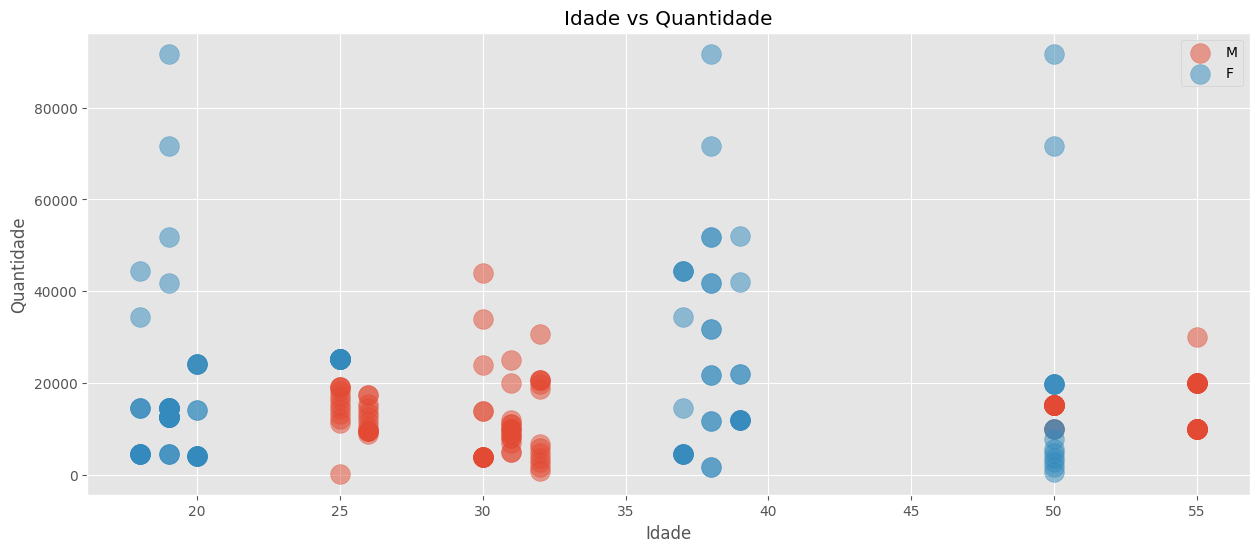

In [64]:
# Visualizando a relação entre Idade e Quantidade comprada
plt.figure(1 , figsize = (15 , 6))
for Sexo in ['M' , 'F']:
    plt.scatter(x = 'Idade' , y = 'Quantidade' , data = IdadeQuantidade[IdadeQuantidade['Sexo'] == Sexo], s = 200 , alpha = 0.5 , label = Sexo)
plt.xlabel('Idade'), plt.ylabel('Quantidade') 
plt.title('Idade vs Quantidade')
plt.legend()
plt.show()

**Distribuição de Idade, Renda Anual e Pontuação de Gastos segmentado por Sexo**

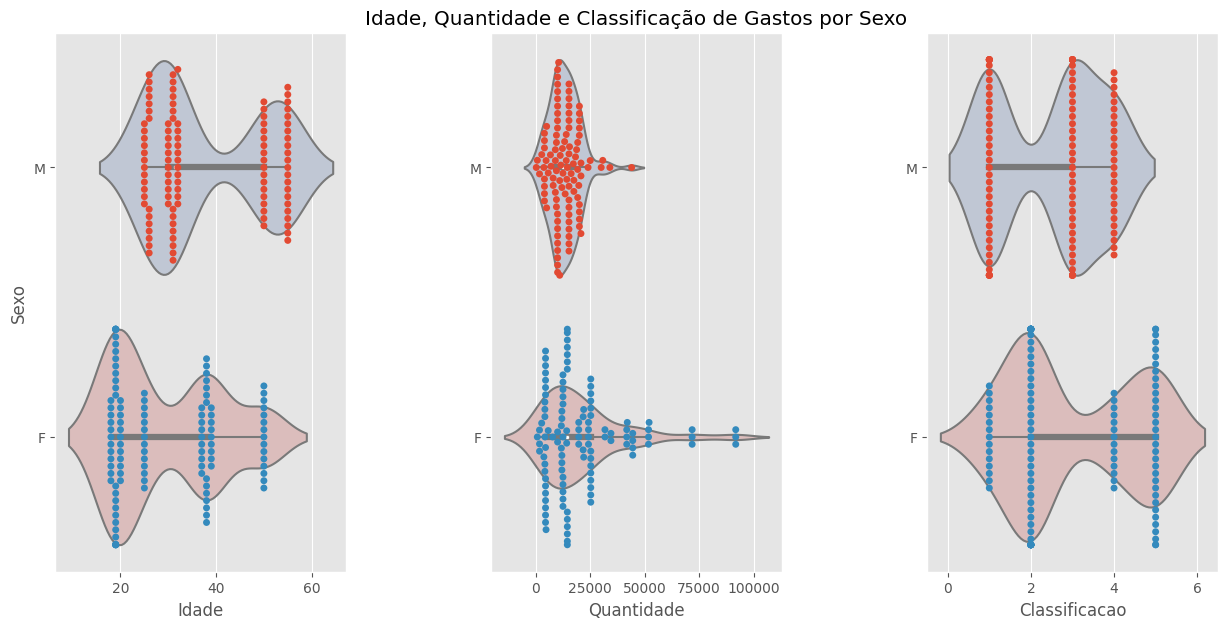

In [65]:
plt.figure(1 , figsize = (15 , 7))
n = 0 
for cols in ['Idade' , 'Quantidade' , 'Classificacao']:
    n += 1 
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    sns.violinplot(x = cols , y = 'Sexo' , data = IdadeQuantidade , palette = 'vlag')
    sns.swarmplot(x = cols , y = 'Sexo' , data = IdadeQuantidade)
    plt.ylabel('Sexo' if n == 1 else '')
    plt.title('Idade, Quantidade e Classificação de Gastos por Sexo' if n == 2 else '')
plt.show()

## Visualização de Dados

- Power BI (Viram no vídeo [Youtube](https://www.youtube.com/watch?v=2VSF4IaF_OE))

## Modelo Machine Learning - Clusterização

*Machine Learning* é um subgrupo da IA que utiliza técnicas estatísticas para dar aos computadores a habilidade de aprender com dados sem serem explicitamente programados.

**Algoritmo KMeans**

*   **n_clusters**: número de clusters que queremos gerar com os nossos dados
*   **init**: se refere ao modo como o algoritmo será inicializado.
> *k-means++*: É o método padrão, e os centróides serão gerados utilizando um método inteligente que favorece a convergência.
>>
> *random*: Se refere ao modo de inicialização de forma aleatória, ou seja, os centróides iniciais serão gerados de forma totalmente aleatória sem um critério para seleção.
>>
> *ndarray*: array de valores indicando qual seriam os centróides que o algoritmo deveria utilizar  para a inicialização

* **max_iter**: Quantidade máxima de vezes que o algoritmo irá executar, por padrão o valor é 300 iterações.
* **n_jobs**: Quantos CPU´s iremos utilizar para executar o K-means.
* **algorithm**: Versão do algoritmo K-Means a ser utilizada. A versão clássica é executada através do valor full.

**Atributos Importantes** 
> **inertia**: Soma das distâncias quadráticas intra cluster.
>>
> **labels_**: Rótulos dos Clusters atribuídos.
>>
> **cluster_centers_**: Valores dos Centroides.

Selecionando o número de clusters através do método Elbow (Soma das distâncias quadráticas intra clusters).

In [66]:
from sklearn.cluster import KMeans

In [67]:
X2 = IdadeQuantidade[['Quantidade' , 'Classificacao']].iloc[: , :].values
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n))
    algorithm.fit(X2)
    inertia.append(algorithm.inertia_)

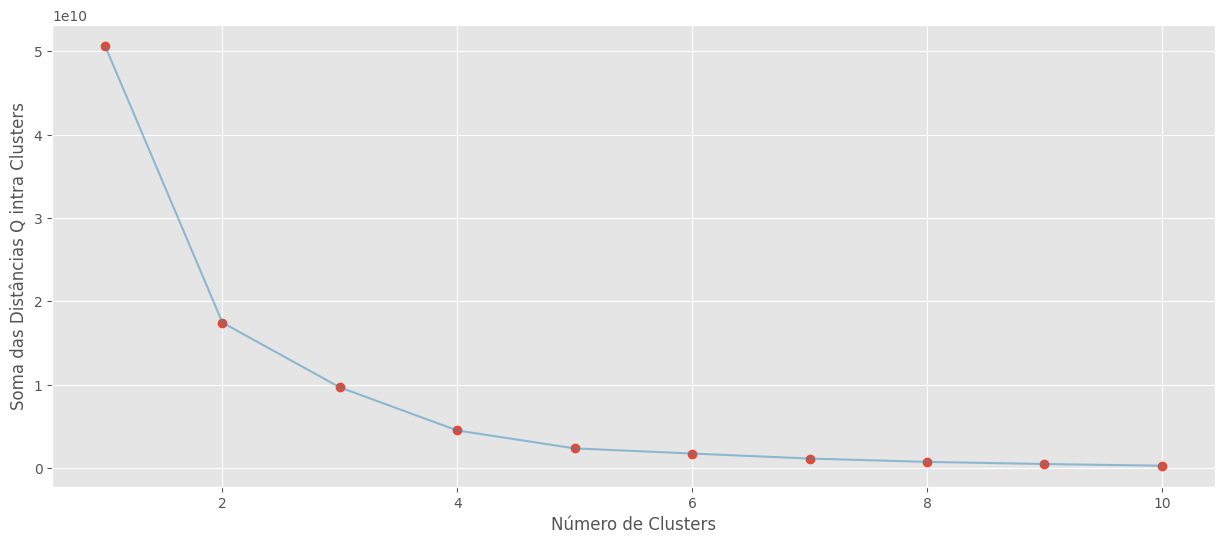

In [68]:
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Número de Clusters') , plt.ylabel('Soma das Distâncias Q intra Clusters')
plt.show()

Inicializando e Computando o KMeans com o valor de 4 clusters

In [69]:
algorithm = (KMeans(n_clusters = 4))
algorithm.fit(X2)

KMeans(n_clusters=4)

In [70]:
# Visualizando os dados agrupados
IdadeQuantidade["clusters"] = algorithm.labels_

In [73]:
IdadeQuantidade

,CodigoVenda,DataVenda,CodigoCliente,CodigoProduto,Quantidade,ValorUnitario,CodigoVendedor,CodigoCanalVendas,CodigoStatus,Deletado,NomeCliente,Idade,Classificacao,Sexo,Cidade,Estado,Pais,clusters
0,1,2010-02-01,1,1.00,4000,0.34,2,1,1,0,Cliente AA,30,3,M,Florianópolis,Santa Catarina,Brasil,2
1,2,2010-02-01,1,NaN,4000,0.34,2,1,1,0,Cliente AA,30,3,M,Florianópolis,Santa Catarina,Brasil,2
2,3,2010-02-01,5,1.00,4200,0.34,4,1,1,0,Cliente BB,20,2,F,Belo Horizonte,Minas Gerais,Brasil,2
3,4,2010-02-02,3,2.00,250,7.00,2,1,1,0,Cliente BC,25,4,M,Baturité,Ceará,Brasil,2
4,5,2010-02-03,4,1.00,4500,0.34,1,1,1,0,Cliente CC,19,2,F,Fortaleza,Ceará,Brasil,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214,247,2020-04-01,18,5.00,20030,9.00,2,1,1,0,Cliente GRM,55,1,M,Gramado,Rio Grande do Sul,Brasil,0
215,248,2023-02-01,18,5.00,20030,9.00,2,1,1,0,Cliente GRM,55,1,M,Gramado,Rio Grande do Sul,Brasil,0
216,249,2023-03-01,18,5.00,20030,9.00,2,1,1,0,Cliente GRM,55,1,M,Gramado,Rio Grande do Sul,Brasil,0
217,250,2023-04-01,18,5.00,30030,9.00,2,1,1,0,Cliente GRM,55,1,M,Gramado,Rio Grande do Sul,Brasil,0


In [74]:
df_group = IdadeQuantidade.drop(['CodigoVenda','DataVenda','CodigoCliente', 'CodigoProduto', 'ValorUnitario', 'CodigoVendedor', 'CodigoCanalVendas', 'CodigoStatus', 'Deletado', 'Idade'],axis=1).groupby("clusters")

In [75]:
df_group.describe()

Quantidade                                                        \
              count     mean      std      min      25%      50%      75%   
clusters                                                                    
0             89.00 18911.69  4252.19 13500.00 15250.00 19250.00 22000.00   
1             19.00 41776.32  7174.85 30750.00 34500.00 42000.00 44500.00   
2            105.00  7734.00  3664.79   250.00  4500.00  9000.00 10500.00   
3              6.00 81750.00 10954.45 71750.00 71750.00 81750.00 91750.00   

                  Classificacao                                     
              max         count mean  std  min  25%  50%  75%  max  
clusters                                                            
0        30030.00         89.00 2.56 1.36 1.00 1.00 2.00 4.00 5.00  
1        52000.00         19.00 4.05 1.31 2.00 3.00 5.00 5.00 5.00  
2        13250.00        105.00 2.68 1.32 1.00 2.00 3.00 4.00 5.00  
3        91750.00          6.00 2.67 1.86 1.00 1.25 2.00 4.25 5.00